<a href='https://honglab.ai'><p style="text-align:center;"><img src='https://lh3.googleusercontent.com/lY3ySXooSmwsq5r-mRi7uiypbo0Vez6pmNoQxMFhl9fmZJkRHu5lO2vo7se_0YOzgmDyJif9fi4_z0o3ZFdwd8NVSWG6Ea80uWaf3pOHpR4GHGDV7kaFeuHR3yAjIJjDgfXMxsvw=w2400'  class="center" width="100%" height="100%"/></p></a>

<center><em>Content Copyright by HongLab, Inc.</em></center>

# 직선 맞추기(Line Fitting)



직선의 방정식 $ y = ax + b $에서 $a$와 $b$를 결정하는 문제

데이터 샘플이 부족할 경우(Under-Constrained)

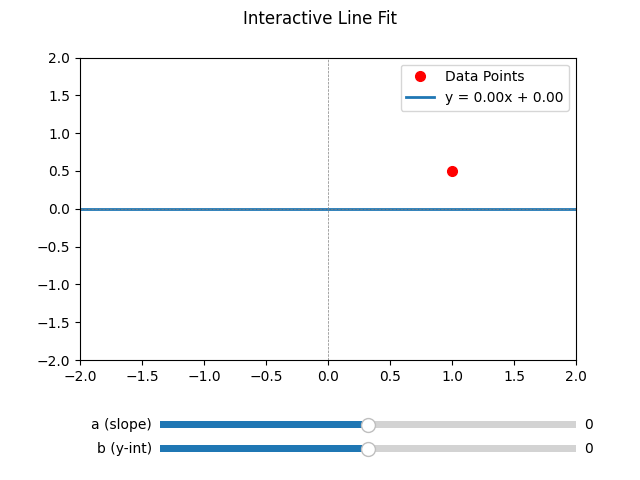

In [1]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np

%matplotlib ipympl

points_x = np.array([1])
points_y = np.array([0.5])

a, b = 0.0, 0.0
x = np.linspace(-2, 2, 500) # Reduced points for slightly faster update

fig = plt.figure()
fig.suptitle("Interactive Line Fit")
plt.subplots_adjust(bottom=0.25)

ax = plt.axes()
ax.plot(points_x, points_y, 'ro', markersize=7, label='Data Points')
line, = ax.plot(x, a * x + b, lw=2, label=f'y = {a:.2f}x + {b:.2f}')

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.axhline(0, color='grey', linewidth=0.5, linestyle='--')
ax.axvline(0, color='grey', linewidth=0.5, linestyle='--')
ax.legend()

slider_a = Slider(plt.axes([0.25, 0.1, 0.65, 0.03]), "a (slope)", -5, 5, valinit=a)
slider_b = Slider(plt.axes([0.25, 0.05, 0.65, 0.03]), "b (y-int)", -5, 5, valinit=b)

def update(val):
    current_a = slider_a.val
    current_b = slider_b.val
    line.set_ydata(current_a * x + current_b)
    line.set_label(f'y = {current_a:.2f}x + {current_b:.2f}')
    ax.legend()
    fig.canvas.draw_idle()

slider_a.on_changed(update)
slider_b.on_changed(update)

plt.show()

샘플 수가 딱 맞을 경우 (Properly Constrained)

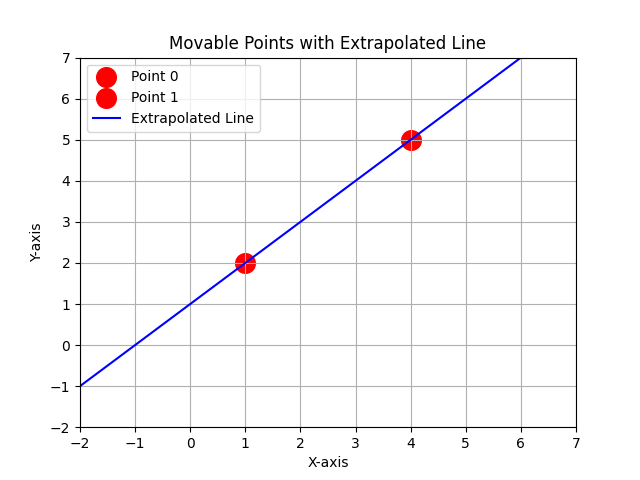

In [2]:
import matplotlib.pyplot as plt

x0, y0 = 1, 2
x1, y1 = 4, 5

def compute_line(x0, y0, x1, y1):
    a = (y1 - y0) / (x1 - x0)
    b = y0 - a * x0
    return a, b

fig, ax = plt.subplots()
ax.set_xlim(-2, 7)
ax.set_ylim(-2, 7)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_title("Movable Points with Extrapolated Line")
ax.grid(True)

point_size = 200
point0 = ax.scatter(x0, y0, s=point_size, color='red', picker=True, label="Point 0")
point1 = ax.scatter(x1, y1, s=point_size, color='red', picker=True, label="Point 1")

a, b = compute_line(x0, y0, x1, y1)
x_extrapolated = [x0 - 3, x1 + 3]
line, = ax.plot(x_extrapolated, [a * x + b for x in x_extrapolated], color='blue', label="Extrapolated Line")

dragging = None

def on_press(event):
    global dragging
    if event.inaxes != ax:
        return
    x, y = event.xdata, event.ydata
    if abs(x - x0) < 0.2 and abs(y - y0) < 0.2:
        dragging = "point0"
    elif abs(x - x1) < 0.2 and abs(y - y1) < 0.2:
        dragging = "point1"

def on_release(event):
    global dragging
    dragging = None

def on_move(event):
    if event.inaxes != ax or dragging is None:
        return
    global x0, y0, x1, y1
    x, y = event.xdata, event.ydata
    if dragging == "point0":
        x0, y0 = x, y
        point0.set_offsets([[x0, y0]])
    elif dragging == "point1":
        x1, y1 = x, y
        point1.set_offsets([[x1, y1]])
    a, b = compute_line(x0, y0, x1, y1)
    x_extrapolated = [x0 - 3, x1 + 3]
    line.set_xdata(x_extrapolated)
    line.set_ydata([a * x + b for x in x_extrapolated])
    plt.draw()

fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('button_release_event', on_release)
fig.canvas.mpl_connect('motion_notify_event', on_move)

plt.legend()
plt.show()

데이터 샘플이 너무 많아서 모두 만족시킬 수 없는 경우 (Over-Constrained)

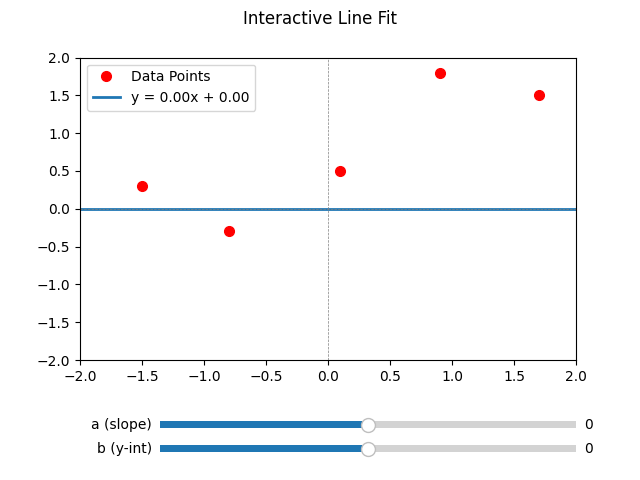

In [3]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np

%matplotlib ipympl

points_x = np.array([-1.5, -0.8, 0.1, 0.9, 1.7])
points_y = np.array([0.3, -0.3, 0.5, 1.8, 1.5])

a, b = 0.0, 0.0
x = np.linspace(-2, 2, 500) # Reduced points for slightly faster update

fig = plt.figure()
fig.suptitle("Interactive Line Fit")
plt.subplots_adjust(bottom=0.25)

ax = plt.axes()
ax.plot(points_x, points_y, 'ro', markersize=7, label='Data Points')
line, = ax.plot(x, a * x + b, lw=2, label=f'y = {a:.2f}x + {b:.2f}')

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.axhline(0, color='grey', linewidth=0.5, linestyle='--')
ax.axvline(0, color='grey', linewidth=0.5, linestyle='--')
ax.legend()

slider_a = Slider(plt.axes([0.25, 0.1, 0.65, 0.03]), "a (slope)", -5, 5, valinit=a)
slider_b = Slider(plt.axes([0.25, 0.05, 0.65, 0.03]), "b (y-int)", -5, 5, valinit=b)

def update(val):
    current_a = slider_a.val
    current_b = slider_b.val
    line.set_ydata(current_a * x + current_b)
    line.set_label(f'y = {current_a:.2f}x + {current_b:.2f}')
    ax.legend()
    fig.canvas.draw_idle()

slider_a.on_changed(update)
slider_b.on_changed(update)

plt.show()

### 일반 최소 제곱법 (Ordinary Least Squares)

데이터 샘플들

$$ (x_1, y_1), (x_2, y_2), \cdots , (x_n, y_n) $$

주의: 1에서 n

$$\hat{y}_1 = ax_1 + b$$

$$\hat{y}_2 = ax_2 + b$$

$$...$$

$$\hat{y}_n = ax_n + b$$

오차 $e_i = y_i - \hat{y}_i$

최소 제곱법은 오차의 제곱들의 합을 최소로 만드는 $a$와 $b$를 찾는 것입니다. 

참고: 일반(ordinary) 최소 자승법에서는 모든 샘플들이 동일한 중요도(가중치)를 갖습니다.


$$\mathcal{L} = \mathcal{L}(a, b) = e^2_1 + e^2_2 + \ldots + e^2_n = (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + \ldots + (y_n - \hat{y}_n)^2$$

$$= \Sigma^n_{i=1} (y_i - \hat{y}_i)^2 = \Sigma^n_{i=1}(y_i - ax_i - b)^2$$

여기서 $\mathcal{L}(a, b)$를 최소로 만드는 $a$와 $b$를 찾는 것입니다. 이때 포인트는 $\mathcal{L}(a, b)$이 될 수 있는 최소값이 구체적으로 뭔지는 모른다는 점입니다. 이런 상황을 등산에 비유를 한다면 정상의 높이가 정확히 해발 몇 km인지 모르는 상태로 최대한 올라갈 수 있는데까지 올라가라는 명령을 받은 것과 비슷합니다. 심지어 한걸음 걸을 때마다 지형이 조금씩 변합니다. 여러 명이 같이 올라가는데 각자가 한걸음을 어디로 내딛느냐에 따라서 또 달라집니다. 대신에 최소제곱법에서는 산 꼭대기가 반드시 존재하며 딱 하나 뿐이기 때문에 다같이 꼭대기에 모일 수 있다는 것은 확실합니다. 

안내
- 사용하는 기호들이 확률/통계쪽이 아니라 ML쪽 기호들입니다. 
- 이 내용은 지나가는 중간 단계이며 뒤에서 경사하강법 이해하는 것이 목표입니다.

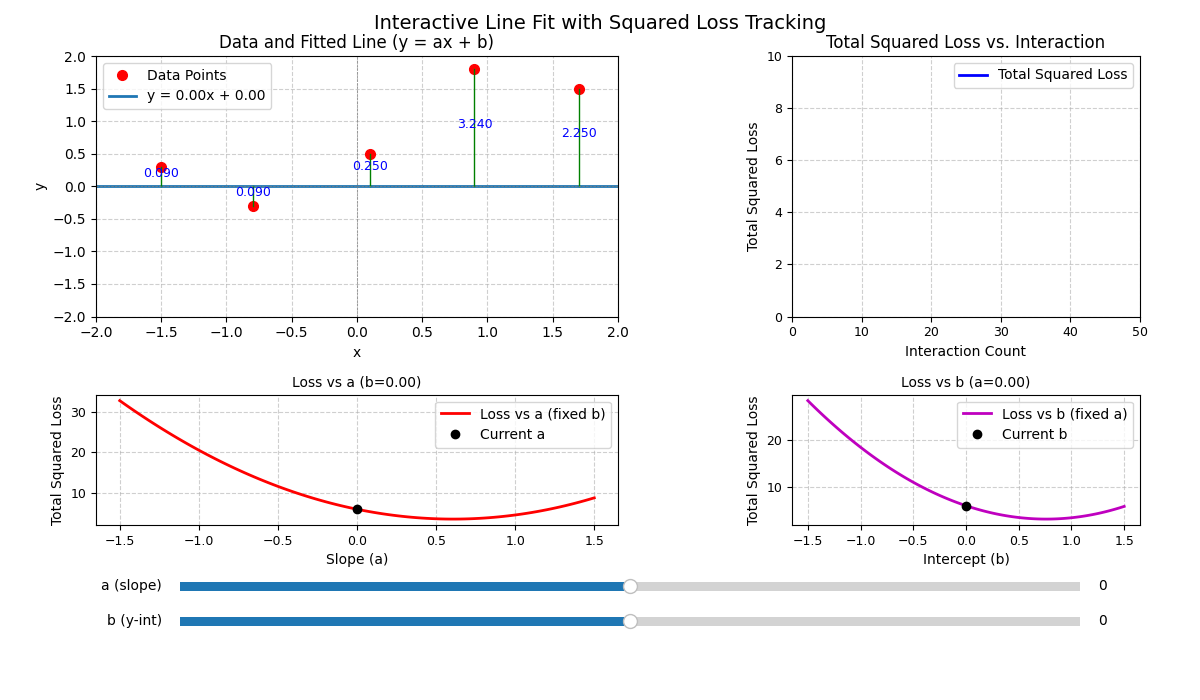

In [4]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.gridspec import GridSpec
import numpy as np

%matplotlib ipympl

# Ensure you are in an environment that supports ipympl (like Jupyter Lab/Notebook)
# and have it installed (`pip install ipympl`)
# %matplotlib ipympl  # Keep this commented out for direct script execution

# Data points
points_x = np.array([-1.5, -0.8, 0.1, 0.9, 1.7])
points_y = np.array([0.3, -0.3, 0.5, 1.8, 1.5])

# Initial values for a and b
a, b = 0, 0 # 임의의 숫자에서 시작, 아주 우연히 좋은 값으로 시작할 수도 있음.
x = np.linspace(-2, 2, 100)
a_range = np.linspace(-1.5, 1.5, 100)  # Range of 'a' for Loss vs a plot
b_range = np.linspace(-1.5, 1.5, 100)  # Range of 'b' for Loss vs b plot

# Create the figure
fig = plt.figure(figsize=(12, 7)) # Slightly wider figure
fig.suptitle("Interactive Line Fit with Squared Loss Tracking", fontsize=14)

# --- MODIFICATION: Adjust width and height ratios ---
gs = GridSpec(2, 2, width_ratios=[3, 2], height_ratios=[2, 1], figure=fig)
# --- End of Modification ---


# Add subplots using the grid specification
ax_main        = fig.add_subplot(gs[0, 0])
ax_loss        = fig.add_subplot(gs[0, 1])
ax_loss_vs_a = fig.add_subplot(gs[1, 0])
ax_loss_vs_b = fig.add_subplot(gs[1, 1])


# Adjust layout spacing - increased wspace
fig.subplots_adjust(left=0.08, right=0.95, bottom=0.25, top=0.92, wspace=0.4, hspace=0.4) # Increased wspace


# --- Main Plot (ax_main) ---
ax_main.plot(points_x, points_y, 'ro', markersize=7, label='Data Points')
line, = ax_main.plot(x, a * x + b, lw=2, label=f'y = {a:.2f}x + {b:.2f}')
loss_lines = [ax_main.plot([px, px], [py, a * px + b], 'g-', lw=1)[0] for px, py in zip(points_x, points_y)]
annotations = [ax_main.text(px, (py + (a * px + b)) / 2, f"{(py - (a * px + b))**2:.3f}",
                            fontsize=9, color='blue', ha='center') for px, py in zip(points_x, points_y)]
ax_main.set_title("Data and Fitted Line (y = ax + b)")
ax_main.set_xlabel("x")
ax_main.set_ylabel("y")
ax_main.set_xlim([-2, 2])
ax_main.set_ylim([-2, 2])
ax_main.axhline(0, color='grey', linewidth=0.5, linestyle='--')
ax_main.axvline(0, color='grey', linewidth=0.5, linestyle='--')
ax_main.legend()
ax_main.grid(True, linestyle='--', alpha=0.6)


# --- Loss Tracking Plot (ax_loss) ---
loss_history = []
iteration = []
loss_line_plot, = ax_loss.plot(iteration, loss_history, 'b-', lw=2, label="Total Squared Loss")
ax_loss.set_title("Total Squared Loss vs. Interaction")
ax_loss.set_xlabel("Interaction Count")
ax_loss.set_ylabel("Total Squared Loss")
ax_loss.set_xlim([0, 50])
ax_loss.set_ylim([0, 10])
ax_loss.legend()
ax_loss.grid(True, linestyle='--', alpha=0.6)
ax_loss.tick_params(axis='both', which='major', labelsize=9)


# --- Loss vs a Plot (ax_loss_vs_a) ---
loss_vs_a_values = [sum((points_y - (a_val * points_x + b))**2) for a_val in a_range]
loss_vs_a_plot, = ax_loss_vs_a.plot(a_range, loss_vs_a_values, 'r-', lw=2, label="Loss vs a (fixed b)")
ax_loss_vs_a.set_xlabel("Slope (a)")
ax_loss_vs_a.set_ylabel("Total Squared Loss")
ax_loss_vs_a.set_title(f"Loss vs a (b={b:.2f})", fontsize=10)
ax_loss_vs_a.grid(True, linestyle='--', alpha=0.6)
ax_loss_vs_a.tick_params(axis='both', which='major', labelsize=9)
initial_b = b
current_a_marker, = ax_loss_vs_a.plot(a, sum((points_y - (a * points_x + b))**2), 'ko', markersize=6, label='Current a')
ax_loss_vs_a.legend()


# --- Loss vs b Plot (ax_loss_vs_b) ---
loss_vs_b_values = [sum((points_y - (a * points_x + b_val))**2) for b_val in b_range]
loss_vs_b_plot, = ax_loss_vs_b.plot(b_range, loss_vs_b_values, 'm-', lw=2, label="Loss vs b (fixed a)")
ax_loss_vs_b.set_xlabel("Intercept (b)")
ax_loss_vs_b.set_ylabel("Total Squared Loss")
ax_loss_vs_b.set_title(f"Loss vs b (a={a:.2f})", fontsize=10)
ax_loss_vs_b.grid(True, linestyle='--', alpha=0.6)
ax_loss_vs_b.tick_params(axis='both', which='major', labelsize=9)
initial_a = a
current_b_marker, = ax_loss_vs_b.plot(b, sum((points_y - (a * points_x + b))**2), 'ko', markersize=6, label='Current b')
ax_loss_vs_b.legend()


# --- Sliders ---
slider_ax_left = 0.15
slider_ax_width = 0.75
ax_slider_a = fig.add_axes([slider_ax_left, 0.15, slider_ax_width, 0.025])
ax_slider_b = fig.add_axes([slider_ax_left, 0.10, slider_ax_width, 0.025])
slider_a = Slider(ax_slider_a, "a (slope)", -2, 2, valinit=a)
slider_b = Slider(ax_slider_b, "b (y-int)", -2, 2, valinit=b)


# --- Update Function --- (No changes needed inside the function itself)
def update(val):
    global initial_a, initial_b

    current_a = slider_a.val
    current_b = slider_b.val
    line.set_ydata(current_a * x + current_b)
    line.set_label(f'y = {current_a:.2f}x + {current_b:.2f}')

    total_loss = 0
    for loss_line, annotation, px, py in zip(loss_lines, annotations, points_x, points_y):
        line_y_at_px = current_a * px + current_b
        loss_line.set_ydata([py, line_y_at_px])
        squared_error = (py - line_y_at_px)**2
        annotation.set_position((px, (py + line_y_at_px) / 2))
        annotation.set_text(f"{squared_error:.3f}")
        total_loss += squared_error

    if not loss_history or not np.isclose(total_loss, loss_history[-1]):
        iteration.append(len(iteration) + 1)
        loss_history.append(total_loss)
        loss_line_plot.set_xdata(iteration)
        loss_line_plot.set_ydata(loss_history)
        ax_loss.set_xlim([0, max(50, len(iteration) + 5)])
        max_loss_so_far = max(loss_history) if loss_history else 10
        ax_loss.set_ylim([0, max(10, max_loss_so_far * 1.1)])

    if not np.isclose(current_b, initial_b):
        new_loss_vs_a = [sum((points_y - (a_val * points_x + current_b))**2) for a_val in a_range]
        loss_vs_a_plot.set_ydata(new_loss_vs_a)
        ax_loss_vs_a.set_title(f"Loss vs a (b={current_b:.2f})", fontsize=10)
        initial_b = current_b
        yrange_a = np.ptp(new_loss_vs_a)
        min_loss_a = np.min(new_loss_vs_a)
        if np.isclose(yrange_a, 0): ax_loss_vs_a.set_ylim([min_loss_a - 1, min_loss_a + 1])
        else: ax_loss_vs_a.set_ylim([min_loss_a - 0.1*yrange_a, min_loss_a + 1.1*yrange_a])

    if not np.isclose(current_a, initial_a):
        new_loss_vs_b = [sum((points_y - (current_a * points_x + b_val))**2) for b_val in b_range]
        loss_vs_b_plot.set_ydata(new_loss_vs_b)
        ax_loss_vs_b.set_title(f"Loss vs b (a={current_a:.2f})", fontsize=10)
        initial_a = current_a
        yrange_b = np.ptp(new_loss_vs_b)
        min_loss_b = np.min(new_loss_vs_b)
        if np.isclose(yrange_b, 0): ax_loss_vs_b.set_ylim([min_loss_b - 1, min_loss_b + 1])
        else: ax_loss_vs_b.set_ylim([min_loss_b - 0.1*yrange_b, min_loss_b + 1.1*yrange_b])

    current_loss_at_point = sum((points_y - (current_a * points_x + current_b))**2)
    current_a_marker.set_data([current_a], [current_loss_at_point])
    current_b_marker.set_data([current_b], [current_loss_at_point])

    ax_main.legend()
    ax_loss.legend()
    ax_loss_vs_a.legend()
    ax_loss_vs_b.legend()
    fig.canvas.draw_idle()

slider_a.on_changed(update)
slider_b.on_changed(update)

update(None)
plt.show()

[주의] a값을 바꾸면 오른쪽 아래 b의 Loss 경로에 변화가 생깁니다. b를 바꿀때도 바찬가지로 왼쪽 아래 a의 Loss 경로에 변화가 생깁니다. 뒤에서 경사하강법을 적용할 때는 a먼저 완벽하게 구하고 b를 구하는 것이 아니라 (또는 b를 먼저 완벽하게 구하고 a를 구하는 것이 아니라) a와 b를 함께 찾아가야 합니다.

Loss 함수가 2차곡선이기 때문에 Loss 함수가 가장 작은 점에 대해서 미분이 0이 된다.

$$ \frac{\partial \mathcal{L}}{\partial a} = 0 $$ 
$$ \frac{\partial \mathcal{L}}{\partial b} = 0 $$

$$ \mathcal{L} = \sum_{i=1}^n (y_i - a x_i - b)^2 $$

$$ \frac{\partial \mathcal{L}}{\partial a} = -2 \sum_{i=1}^n x_i (y_i - a x_i - b) = 0$$
$$ \frac{\partial \mathcal{L}}{\partial b} = -2 \sum_{i=1}^n (y_i - a x_i - b) = 0$$

위 두 개의 식을 전개해서 풀면 $a$와 $b$를 구할 수 있습니다. 

($x$가 숫자 하나가 아니라 벡터인 경우에는 선형대수 필요, [위키피디아 OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares) 참고)

이런 방식이 가능한 경우는

- 모델의 형태가 단순한 직선 형태인 경우
- 데이터가 많지 않을 경우 (최근 빅데이터는 한꺼번에 메모리에 넣어놓을 수 없을 정도로 큽니다)

모델이 뉴럴네트워크 같이 크고 복잡한 경우에는 확률적 경사하강법(stochastic gradient descent)을 사용합니다.

[참고] 수식 정리 프롬프트 예시 
- Rewrite \Sigma^n_{i=1}(y_i - ax_i - b)^2 as a polynomial of a <- 강의 노트 수식 복붙
- Proofread the prompt "Rewrite \Sigma^n_{i=1}(y_i - ax_i - b)^2 as a polynomial of a" <- 프롬프트 자체를 개선해줍니다.

### 보충

이해를 돕기 위해 더 단순한 경우에 대해 생각해보겠습니다. 여기서 이해하셔야 하는 포인트는,

1. 로스(loss) 함수가 무엇인지
1. Least squares에서는 왜 로스 함수의 형태가 2차 곡선인지
1. 2차 곡선의 성질을 이용해서 모델을 찾는 원리

입니다.

$y = ax + b$에서 $b = 0$으로 고정시키고 데이터 샘플이 딱 하나 $(x_0, y_0)$ 뿐인 경우를 생각해보면 로스 함수가 아래와 같이 정리됩니다.

$$\mathcal{L}(a) = e^2_0 = (y_0 - ax_0)^2 = x_0^2 a^2 - (2x_0y_0) a + y_0^2$$

2차곡선의 밑바닥은 기울기가 0인 지점이니까 $\mathcal{L}(a)$를 $a$에 대해 미분한 것이 0이된다는 조건을 적용하면

$$\frac{dL(a)}{da} = 2x_0^2 a - 2x_0y_0 = 0$$

$$a = \frac{y_0}{x_0}$$

와 같이 $a$를 결정할 수 있습니다.

[퀴즈] 여기서 $x_0 = 0$이면 나누기를 할 수 없습니다. 이것은 어떤 의미일까요?